In [16]:
# Elabora un modelo predictivo aplicando técnicas de Gradient
# Boosting para resolver un problema de clasificación utilizando
# lenguaje Python.

# Es sabido que, una entidad que presta servicios o productos (pudiera ser una
# empresa, un banco, una tienda, etcétera) puede mejorar la experiencia de
# cliente desarrollando productos personalizados en pos de las preferencias y
# necesidades de cada uno de sus clientes.

# El set de datos potencial contiene datos sobre clientes de una institución
# financiera:
# Customer ID: ID asociado al cliente
# Age: Edad en años del cliente
# Income: Ingreso anual del cliente
# Family: Tamaño del grupo familiar del cliente
# CCAvg: Cupo promedio mensual utilizado en tarjetas de crédito
# Education: Nivel educacional (1 si no es graduado, 2 graduado y 3 si
# posee estudios especializadoss (magister, doctorado, etcétera)
# Mortgage: Monto de la hipoteca (0 indica que no posee)
# ZIP Code: Código postal del domicilio

# En la última campaña a cada cliente se le ofreció un producto personalizado
# en base a su comportamiento financiero, preferencias, capacidad de pago y
# necesidades. La variable target corresponde a Personal Loan el cual indica si el
# cliente tomó o no tomó este producto (¿El cliente aceptó o no el producto
# ofrecido? ), donde 0 indica que el cliente no adquirió el producto y 1 indica que
# sí lo adquirió.

# Es de interés analizar cuáles pudieran ser los perfiles de clientes que tienen
# mayor probabilidad de aceptar el producto ofrecido, de manera de, identificar
# a los clientes con dichas características y priorizarlos a ellos en las próximas
# campañas.

In [22]:
# a) Cargue el set de datos utilizando la función read.excel de pandas. ¿Qué
# columnas le hacen sentido incluir en un modelo para predecir si un cliente
# tomará o no el producto ofrecido? Si desea eliminar alguna columna, recuerde
# que puede usar la función drop('nombre columna a eliminar', axis=1).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Cargamos el set de datos
df = pd.read_excel('data.xlsx', sheet_name='Data')

df = df.set_index('ID') # ID como index

# Eliminamos la columna ID
df = df.drop('ZIP Code', axis=1)

print(df.head())
print()
print(df.shape)


    Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan
ID                                                                
1    25      49       4    1.6          1         0              0
2    45      34       3    1.5          1         0              0
3    39      11       1    1.0          1         0              0
4    35     100       1    2.7          2         0              0
5    35      45       4    1.0          2         0              0

(5000, 7)


In [23]:
# b) Determine cuáles son las variables predictoras que son categorías y obtenga
# las variables dummies correspondientes para incluirlas en el modelo.
# Recuerde que puede usar la función get_dummies() de pandas.

# Obtenemos las variables dummies
df = pd.get_dummies(df, columns=['Education'], drop_first=True)

print(df.head())
print()
print(df.shape)



    Age  Income  Family  CCAvg  Mortgage  Personal Loan  Education_2   
ID                                                                     
1    25      49       4    1.6         0              0        False  \
2    45      34       3    1.5         0              0        False   
3    39      11       1    1.0         0              0        False   
4    35     100       1    2.7         0              0         True   
5    35      45       4    1.0         0              0         True   

    Education_3  
ID               
1         False  
2         False  
3         False  
4         False  
5         False  

(5000, 8)


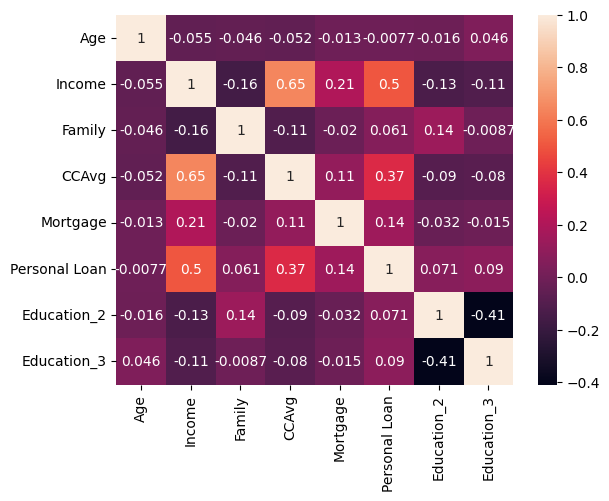

In [24]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()


In [25]:
# c) Defina en un objeto X las variables predictoras y en Y la variable respuesta
# Personal Loan. Obtenga los set de entrenamiento y prueba en una proporción
# 5:1. Recuerde que la función train_test_split() es útil para realizar split simple,
# además fije una semilla 2021 (random_state=2021 en la función
# train_test_split()).

# Definimos las variables predictoras y la variable respuesta
X = df.drop('Personal Loan', axis=1)
Y = df['Personal Loan']

# Obtenemos los set de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2021)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(4000, 7)
(1000, 7)
(4000,)
(1000,)


In [27]:
# d) Obtenga un árbol de decisión con el set de datos de entrenamiento.
# Obtenga el MSE del modelo en el set de prueba. Muestre el árbol obtenido,
# ¿qué observa? ¿cuáles podrían ser los problemas de este árbol? ¿qué
# alternativas pudieran probarse para abordar este problema?

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Obtenemos el arbol de decision
tree = DecisionTreeClassifier(random_state=2021)
tree.fit(X_train, Y_train)

# Obtenemos el MSE del modelo en el set de prueba
Y_pred = tree.predict(X_test)
print('MSE del modelo en el set de prueba:', np.mean((Y_test - Y_pred)**2))



MSE del modelo en el set de prueba: 0.012


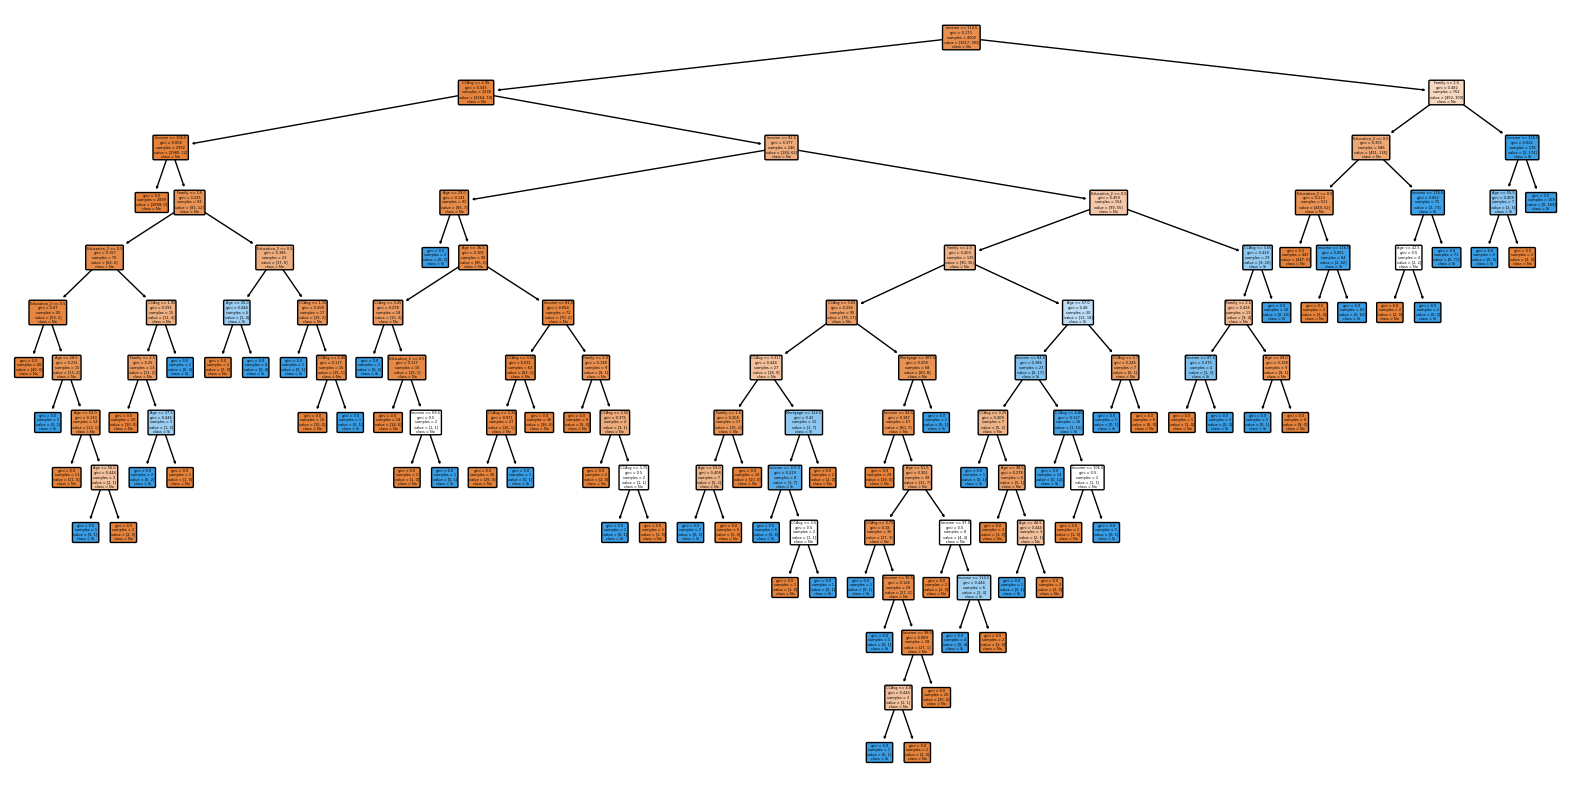

In [28]:
# Mostramos el arbol obtenido
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, rounded=True, class_names=['No', 'Si'], feature_names=X.columns)
plt.show()


¿qué observa? ¿cuáles podrían ser los problemas de este árbol?
- El árbol es muy grande y complejo (overfitting) y no es interpretable (no se puede explicar fácilmente a un humano)
- El árbol es muy sensible a pequeños cambios en los datos de entrenamiento (alta varianza)
- El árbol es muy sensible a outliers
- El árbol es muy sensible a la escala de las variables

¿qué alternativas pudieran probarse para abordar este problema?

- Podemos probar con un árbol de decision con: poda, bagging, boosting o random forest.
- Podemos probar con un modelo de regresión logística, naive bayes, knn, svm, redes neuronales, etc.

In [30]:
# e) Plantee otro árbol de decisión pero definiendo como parámetro de control
# o prepoda la profundidad máxima del árbol, para esto en la función
# DecisionTreeClassifier() añada como argumento max_depth=2 (profundidad
# máxima 2). Obtenga el MSE en el set de prueba y compare con el modelo
# anterior. Observe el árbol obtenido. Comente.

# Obtenemos el arbol de decision
tree = DecisionTreeClassifier(max_depth=2, random_state=2021)
tree.fit(X_train, Y_train)

# Obtenemos el MSE del modelo en el set de prueba
Y_pred = tree.predict(X_test)
print('MSE del modelo en el set de prueba:', np.mean((Y_test - Y_pred)**2))


MSE del modelo en el set de prueba: 0.052


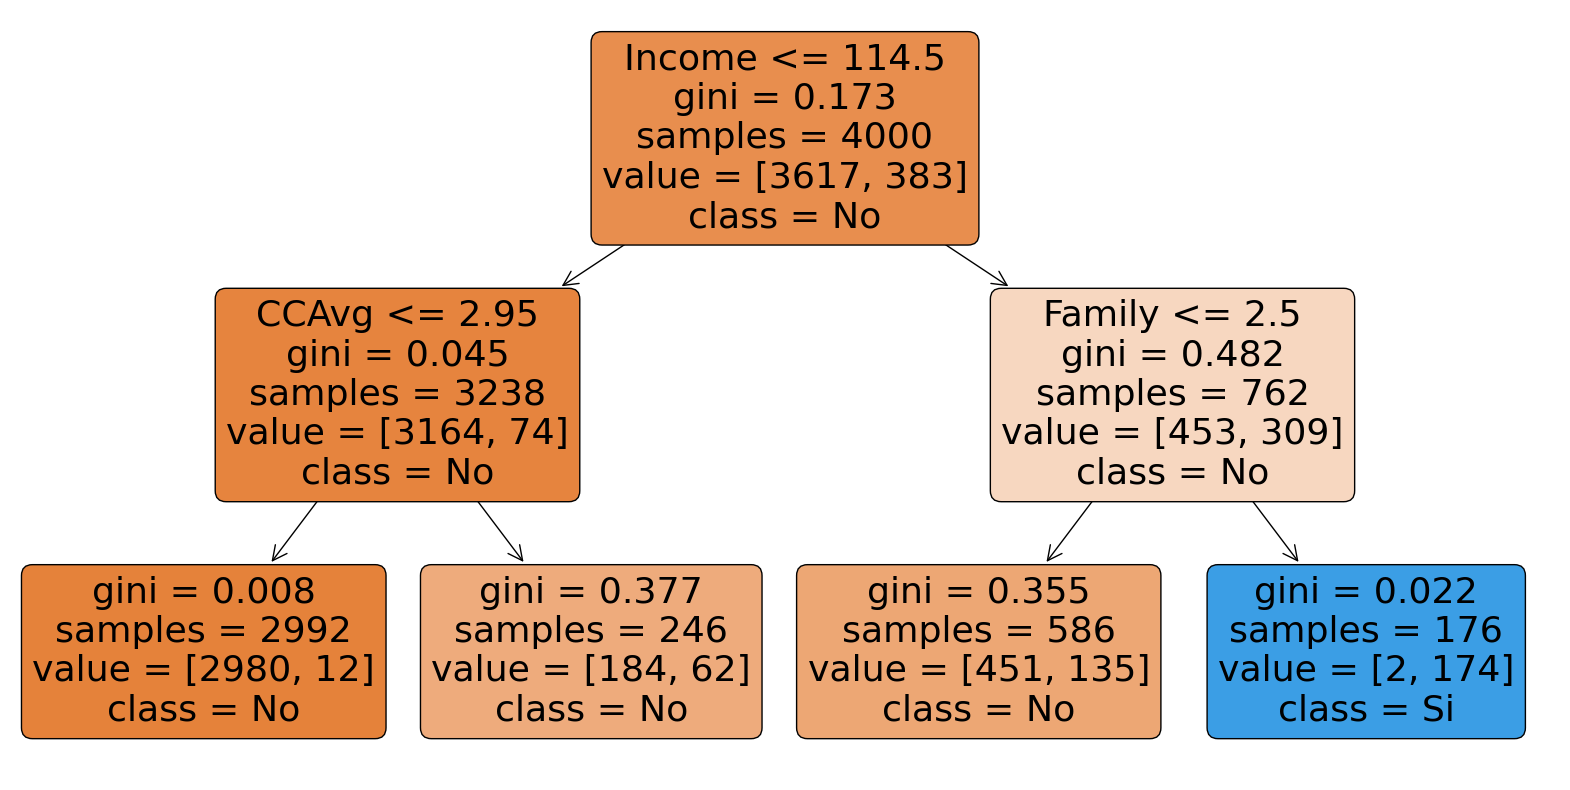

In [31]:
# Mostramos el arbol obtenido
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, rounded=True, class_names=['No', 'Si'], feature_names=X.columns)
plt.show()



Observe el árbol obtenido. Comente.

El arbol obtenido es mucho mas simple que el anterior, ya que solo tiene 2 niveles # y en el anterior tenia 6 niveles. Esto se debe a que en este arbol se limito la profundidad maxima a 2, por lo que el arbol no puede tener mas de 2 niveles.
Esto es una forma de pre-poda, ya que se limita la profundidad maxima del arbol y por lo tanto se limita la cantidad de niveles que puede tener el arbol.
Esto es una forma de evitar el sobreajuste del arbol, ya que al limitar la profundidad maxima del arbol, se limita la cantidad de niveles que puede tener el arbol, por lo que el arbol no puede crecer tanto y por lo tanto no se ajusta tanto a los datos de entrenamiento, por lo que se evita el sobreajuste del arbol.

In [32]:
# f) Busque los mejores valores de los criterios de corte y máxima profundidad
# para este caso, con 10 validaciones cruzadas, y entregue sus valores (Hint:
# evalue los hiperparámetros criterion y max_depth)

# Definimos los valores de los hiperparametros
criterion = ['gini', 'entropy'] # Criterio de corte
max_depth = [2, 3, 4, 5, 6, 7, 8, 9, 10] # Profundidad maxima del arbol


# Definimos el diccionario de los hiperparametros
hiperparametros = dict(criterion=criterion, max_depth=max_depth)

# Definimos el modelo
tree = DecisionTreeClassifier(random_state=2021)

# Definimos la grilla
grid = GridSearchCV(tree, hiperparametros, cv=10, scoring='accuracy') # 10 validaciones cruzadas

# Ajustamos la grilla
grid.fit(X_train, Y_train)

# Obtenemos los mejores hiperparametros
print('Mejores hiperparametros:', grid.best_params_)
print()

# Obtenemos el MSE del modelo en el set de prueba
Y_pred = grid.predict(X_test)
print('MSE del modelo en el set de prueba:', np.mean((Y_test - Y_pred)**2))
print()

# Obtenemos el accuracy del modelo en el set de prueba
print('Accuracy del modelo en el set de prueba:', accuracy_score(Y_test, Y_pred))
print()

# Obtenemos el precision del modelo en el set de prueba
print('Precision del modelo en el set de prueba:', precision_score(Y_test, Y_pred))
print()

# Obtenemos el recall del modelo en el set de prueba
print('Recall del modelo en el set de prueba:', recall_score(Y_test, Y_pred))
print()

# Obtenemos el f1 del modelo en el set de prueba
print('F1 del modelo en el set de prueba:', f1_score(Y_test, Y_pred))
print()

# Obtenemos el AUC del modelo en el set de prueba
print('AUC del modelo en el set de prueba:', roc_auc_score(Y_test, Y_pred))
print()





Mejores hiperparametros: {'criterion': 'gini', 'max_depth': 9}

MSE del modelo en el set de prueba: 0.012

Accuracy del modelo en el set de prueba: 0.988

Precision del modelo en el set de prueba: 0.9775280898876404

Recall del modelo en el set de prueba: 0.8969072164948454

F1 del modelo en el set de prueba: 0.935483870967742

AUC del modelo en el set de prueba: 0.9473461885353517

